# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exercises

### Exercise - Regression

Consider the [🍫 diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) it contains data with $10$ features and a target value representing a quantitative measure of disease progression one year after baseline. Find the _best_ polynomial fit based on the test score for this dataset.

Perform exploratory data analysis, define a suitable performance metric and justify _all_ your choices.
Plot histograms of features distributions and correlation diagrams.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from tensorflow import keras
from functools import partial

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})

Creo un dataframe e controllo che non ci siano problemi con i dati

In [2]:
dt = load_diabetes()
data = pd.DataFrame(dt['data'], columns = dt['feature_names'])
data['target'] = dt['target']
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


Let's create a train set and a test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.values[:,:-1], data.values[:,-1], test_size = 0.2)

train_set = pd.DataFrame(X_train, columns = data.columns[:-1])
train_set['target'] = y_train

test_set = pd.DataFrame(X_test, columns = data.columns[:-1])
test_set['target'] = y_test
train_set

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.009147,-0.044642,-0.056863,-0.050428,0.021822,0.045345,-0.028674,0.034309,-0.009919,-0.017646,183.0
1,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
2,-0.041840,-0.044642,-0.066563,-0.046985,-0.037344,-0.043276,0.048640,-0.039493,-0.056158,-0.013504,59.0
3,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207,127.0
4,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068330,-0.025930,113.0
...,...,...,...,...,...,...,...,...,...,...,...
348,-0.005515,-0.044642,0.023973,0.008101,-0.034592,-0.038892,0.022869,-0.039493,-0.015998,-0.013504,121.0
349,-0.052738,-0.044642,0.054152,-0.026328,-0.055231,-0.033881,-0.013948,-0.039493,-0.074089,-0.059067,142.0
350,0.016281,-0.044642,0.020739,0.021872,-0.013953,-0.013214,-0.006584,-0.002592,0.013316,0.040343,281.0
351,0.048974,0.050680,0.003494,0.070073,-0.008449,0.013404,-0.054446,0.034309,0.013316,0.036201,129.0


Check features's distributions

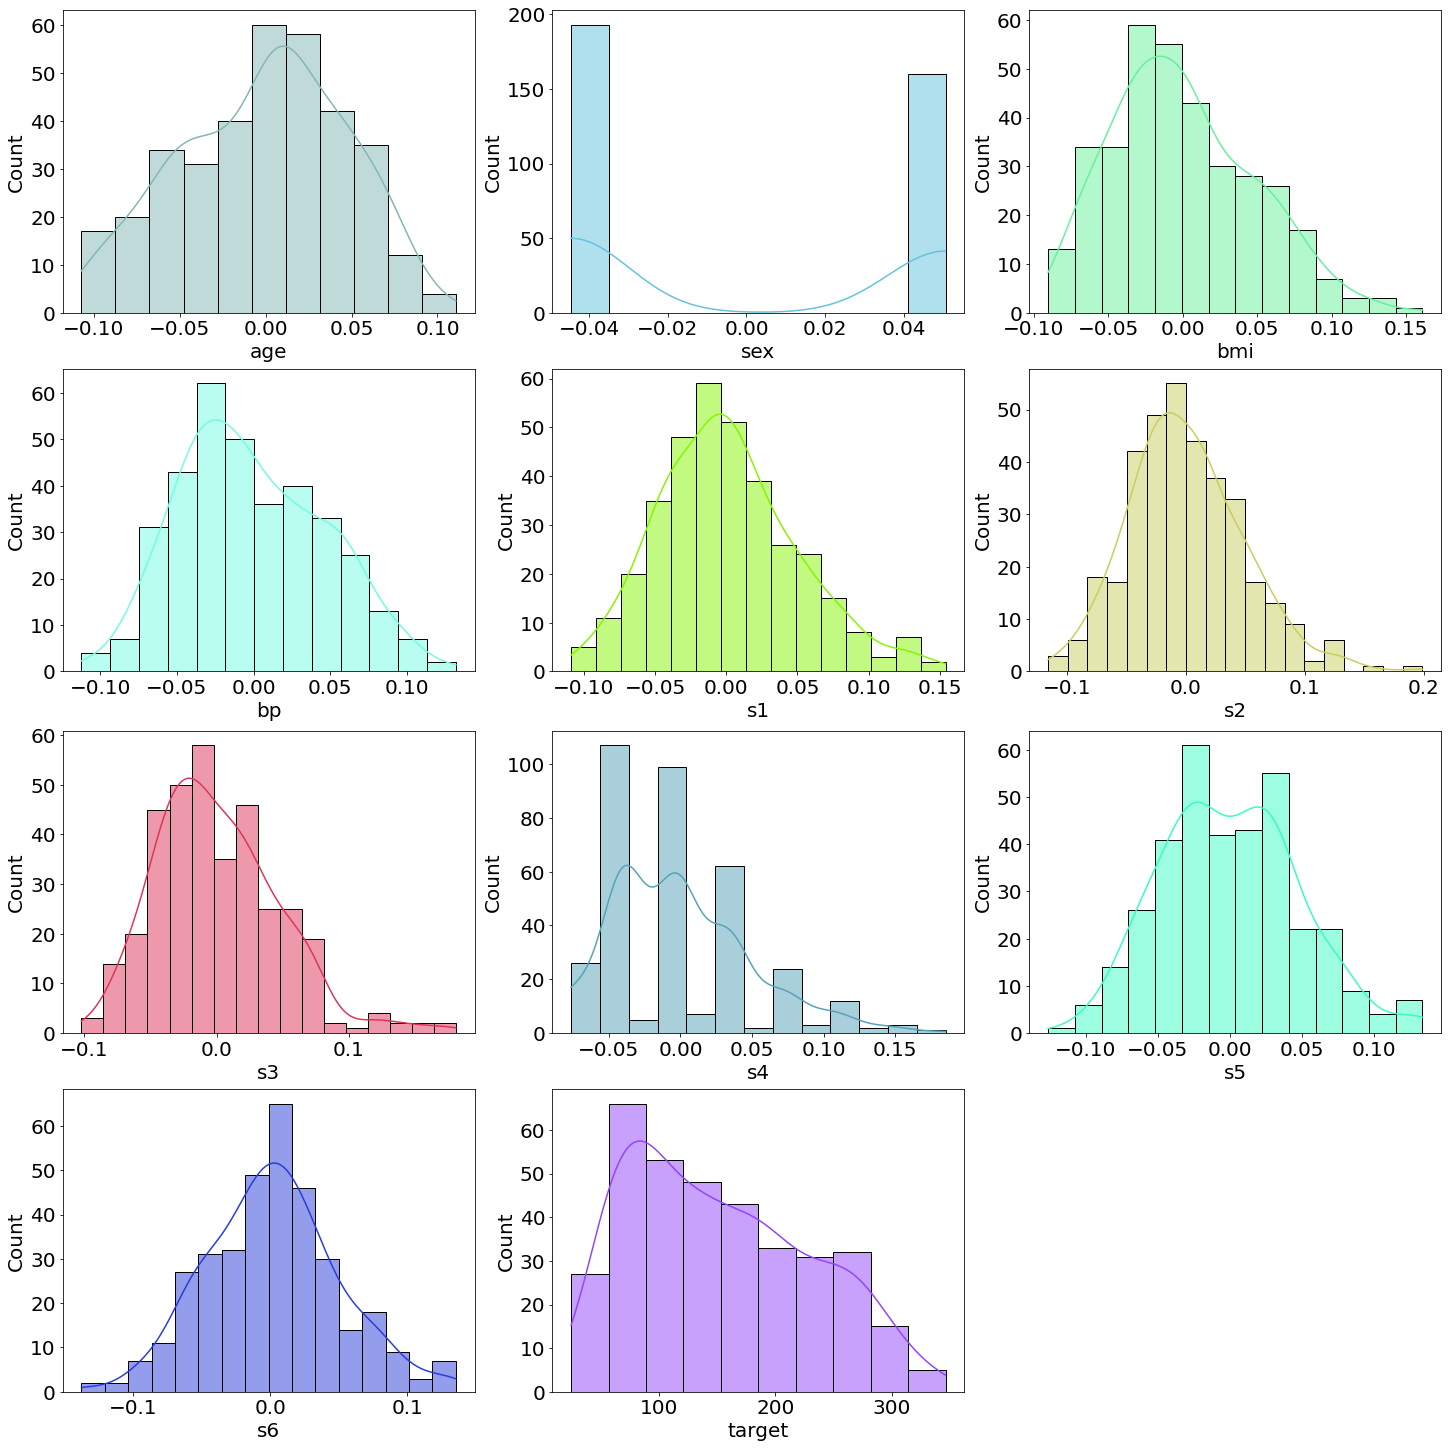

In [4]:
fig,axes = plt.subplots(4, 3, constrained_layout = True, figsize = (20,20) )
for i,ax in enumerate(axes.ravel()):
    if i > 10:
        fig.delaxes(ax)
        continue
    rgb = np.random.rand(3,)
    graph = sns.histplot( x = train_set.iloc[:,i], kde = True, color = rgb, ax = ax)

Check correlation, in particular correlation with target variable

<AxesSubplot:>

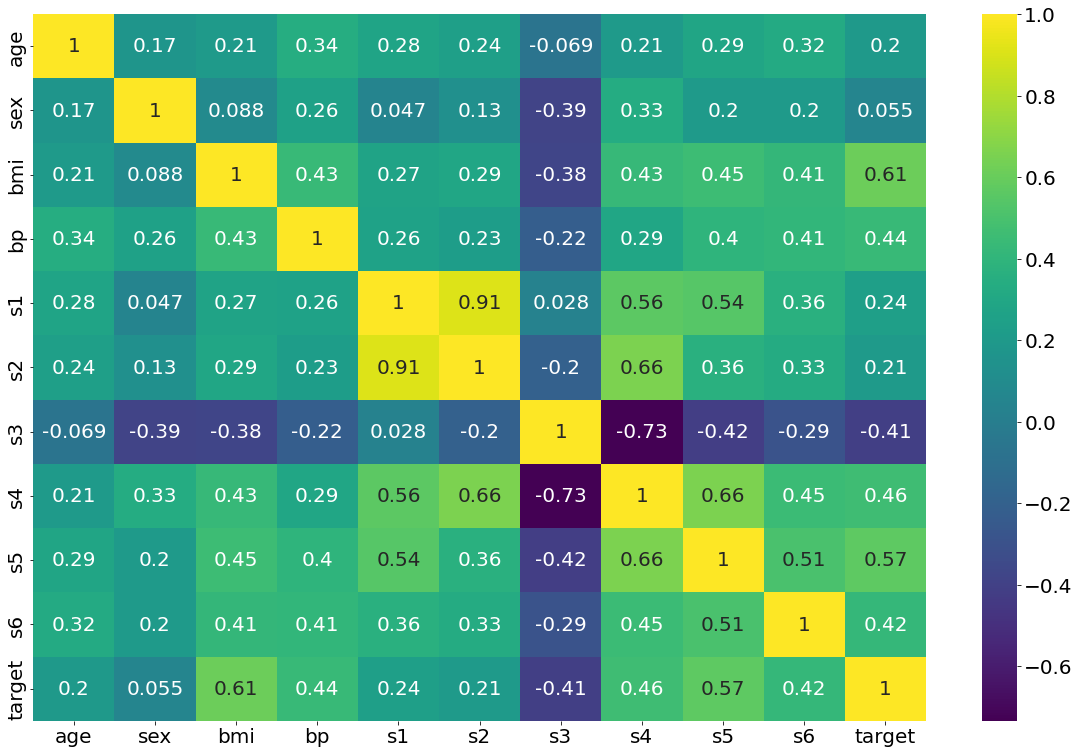

In [5]:
sns.heatmap(train_set.corr(), annot = True, cmap = 'viridis')

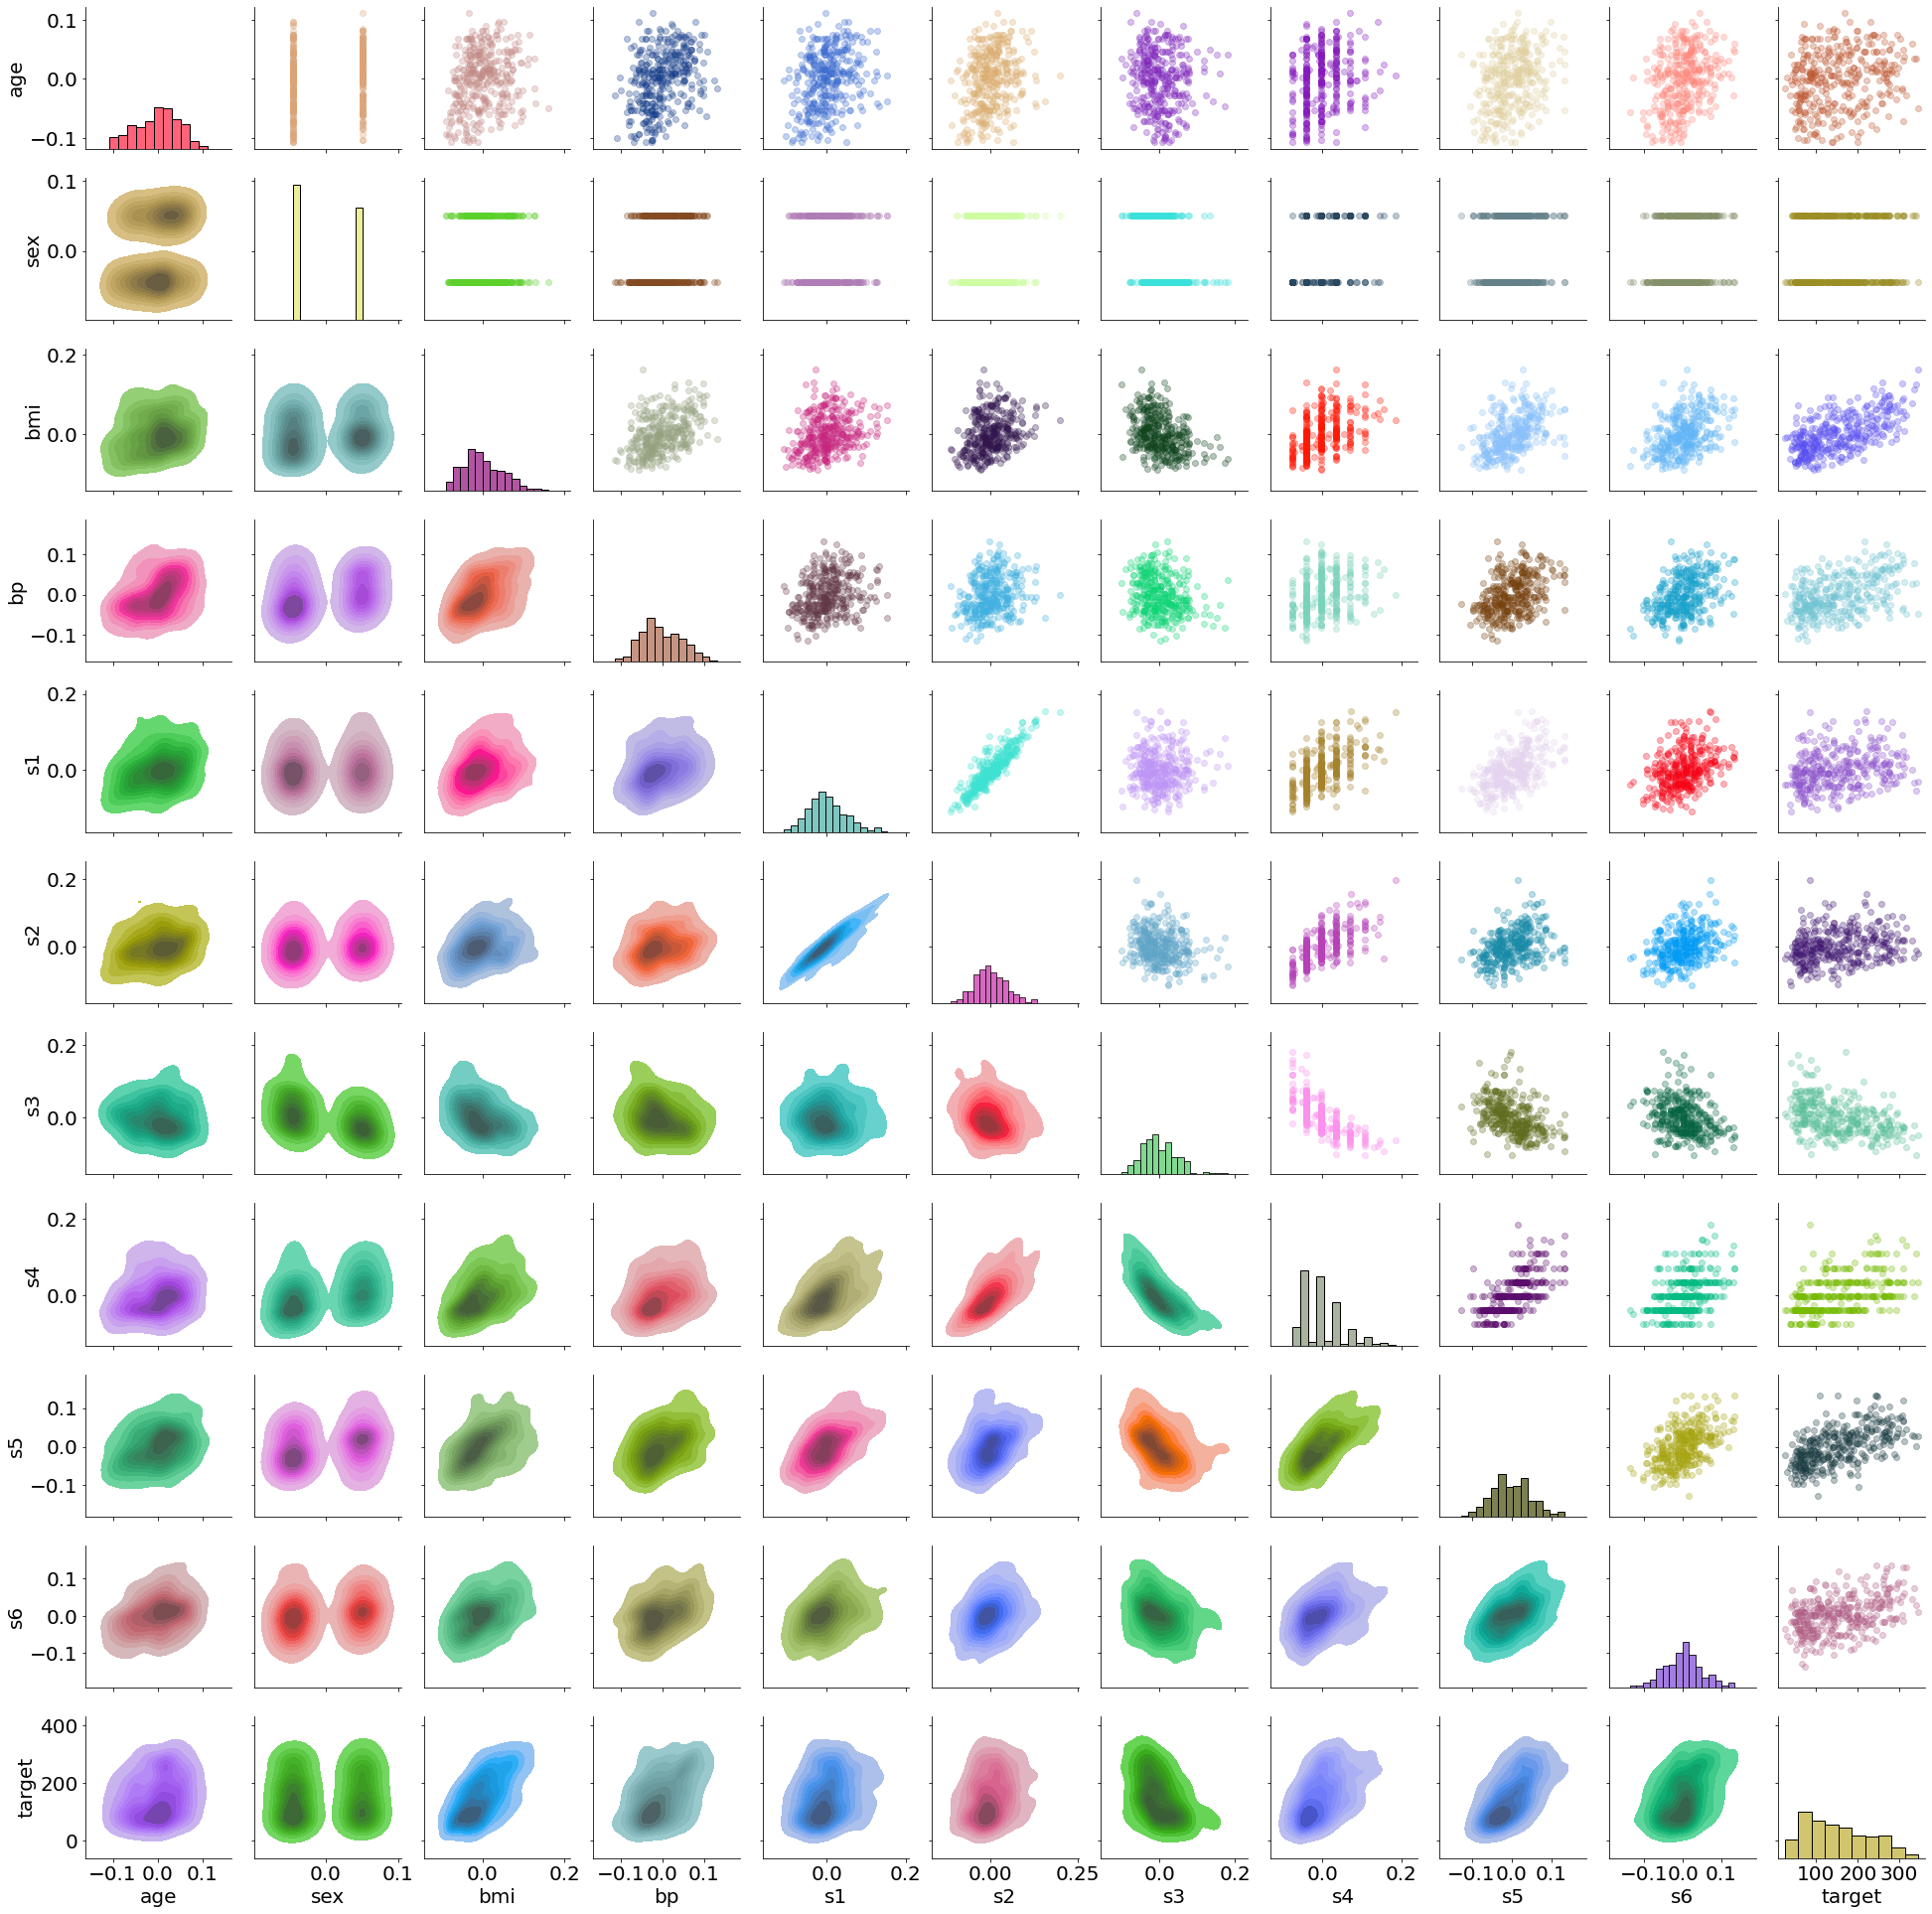

In [6]:
def my_scatter(x, y, **kwargs):
    kwargs['color'] = np.append(np.random.rand(3,), 0.3)
    plt.scatter(x, y, **kwargs)

def my_kde(x, y, **kwargs):
    kwargs['color'] = np.random.rand(3,)
    sns.kdeplot(x, y, fill = True,**kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = np.random.rand(3,)
    sns.histplot(x, **kwargs)

graph = sns.PairGrid(train_set)
graph.map_diag(my_hist)
graph.map_upper(my_scatter)
graph.map_lower(my_kde)

In [7]:
corr = train_set.corr().sort_values(by = 'target', ascending = False).target
corr

target    1.000000
bmi       0.610930
s5        0.572007
s4        0.460955
bp        0.435618
s6        0.419731
s1        0.239261
s2        0.207042
age       0.197176
sex       0.055415
s3       -0.410499
Name: target, dtype: float64

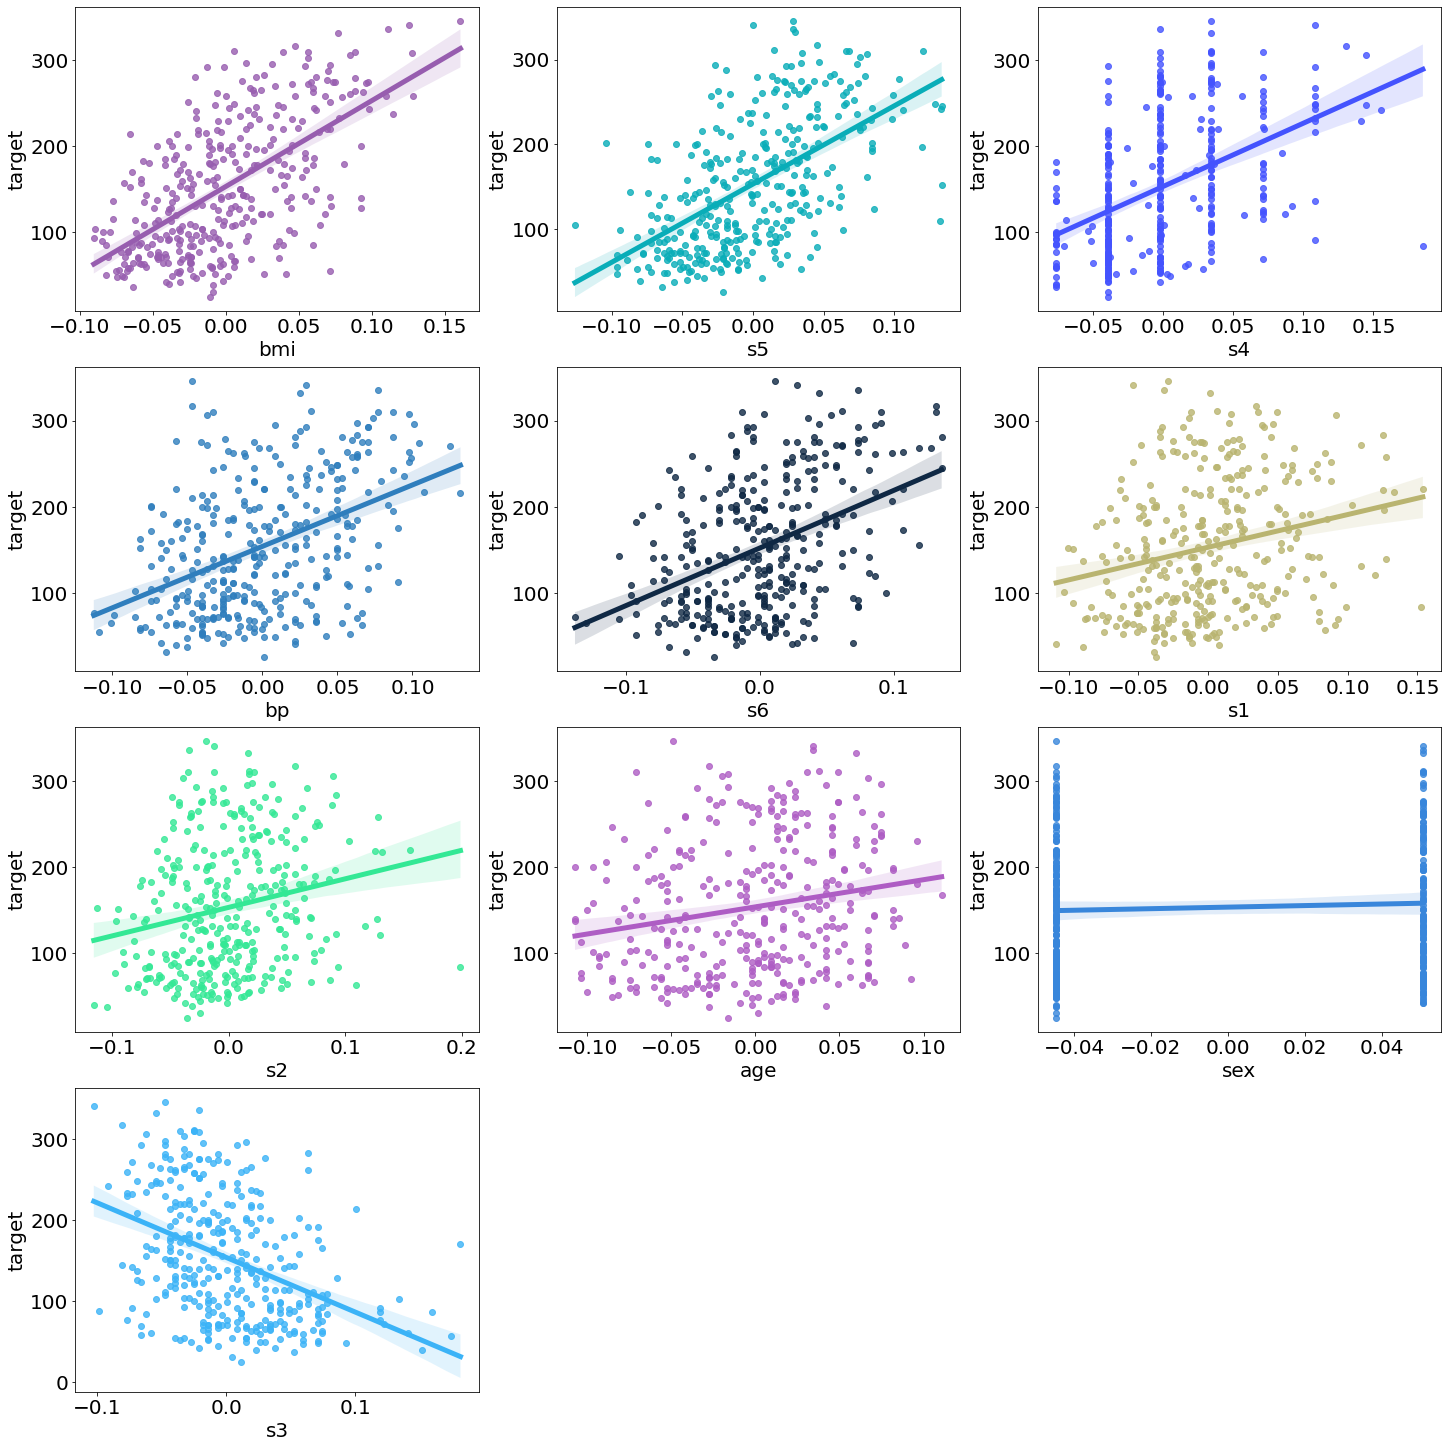

In [8]:
fig, axes = plt.subplots(4,3, constrained_layout = True, figsize = (20,20))
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        fig.delaxes(ax)
        continue
    sns.regplot(x = train_set[corr.index[i+1]], y = train_set[corr.index[0]], color = np.random.rand(3,), line_kws={'linewidth':5}, ax = ax)

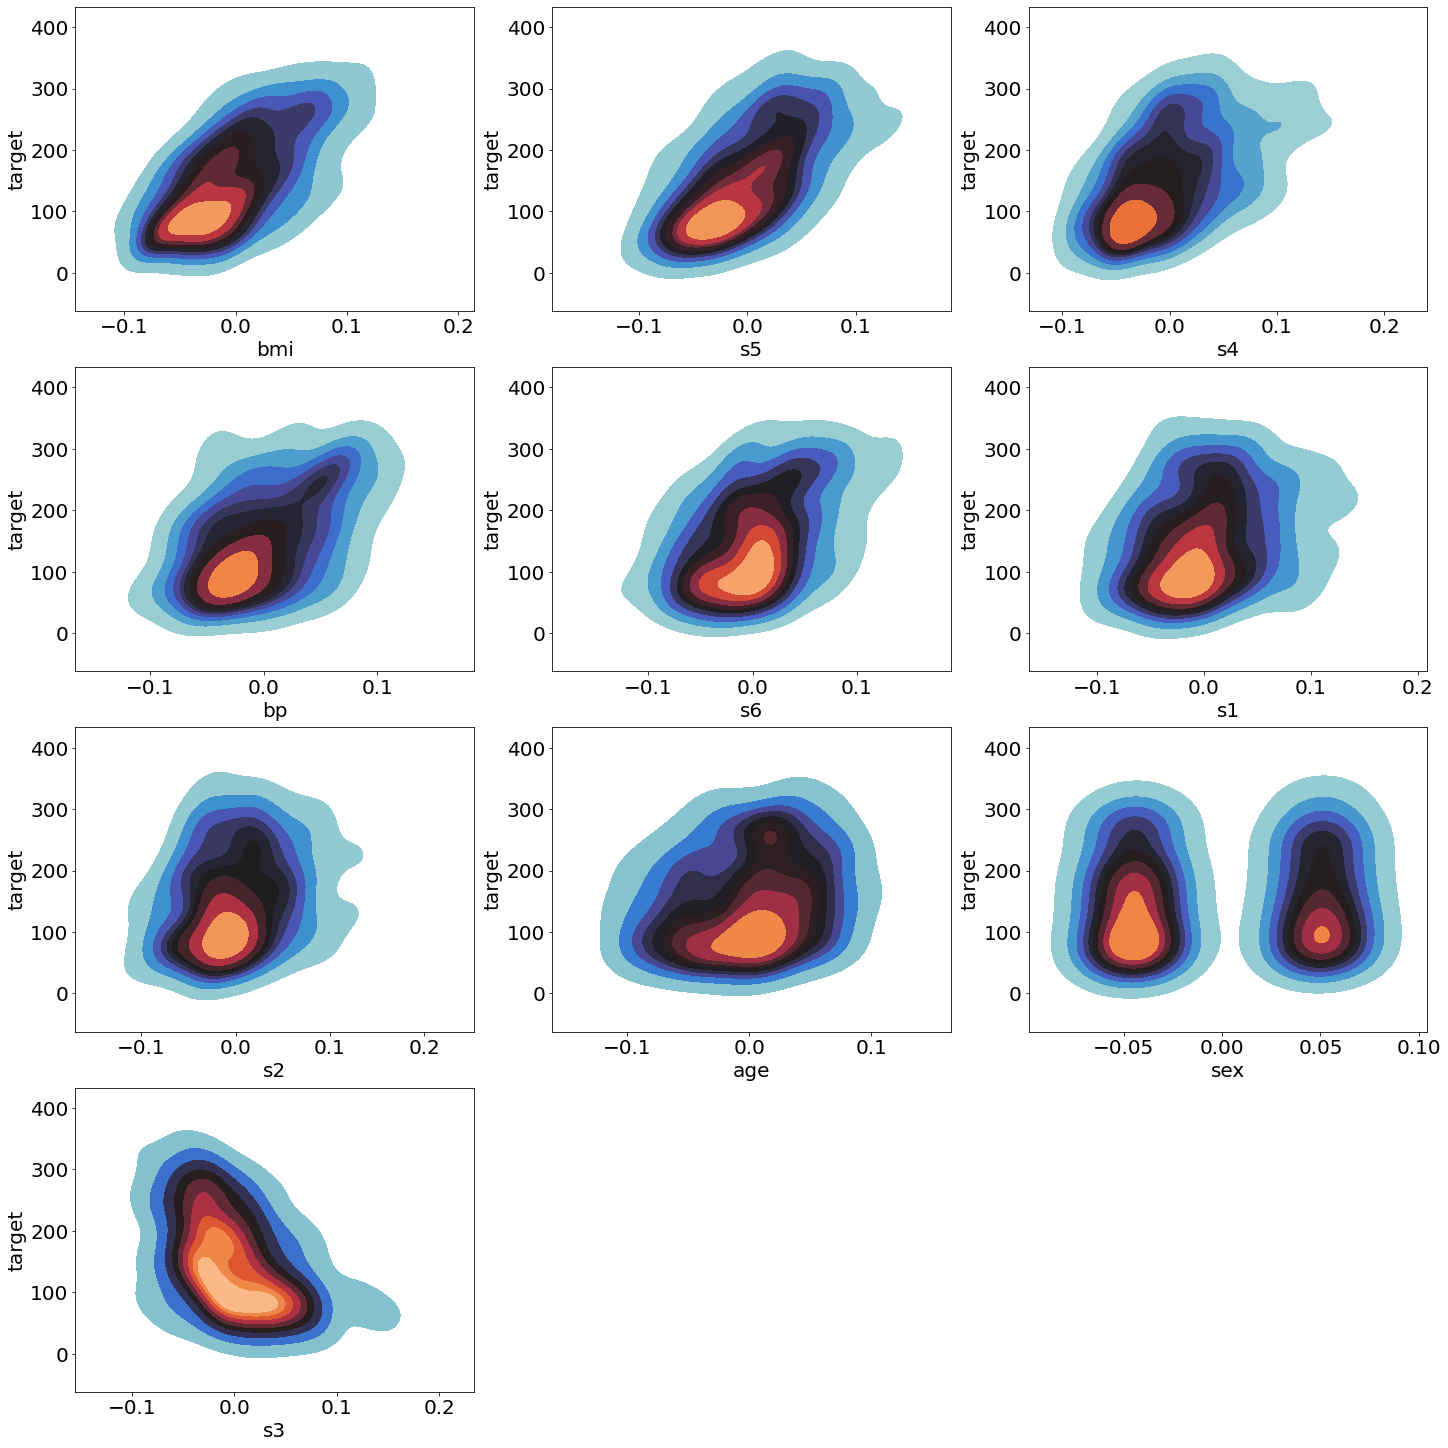

In [9]:
cmap = ['rocket', 'mako', 'flare', 'crest', 'magma', 'viridis', 'vlag', 'icefire', 'Spectral', 'coolwarm']
#Uso un solo colore per comprensibilità del grafico 
cmap_index = np.random.randint(0,10)

fig, axes = plt.subplots(4,3, constrained_layout = True, figsize = (20,20) )
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        fig.delaxes(ax)
        continue
    sns.kdeplot(x = train_set[corr.index[i+1]], y = train_set[corr.index[0]], fill = True, alpha = 1, cmap = cmap[cmap_index], ax = ax)

Let's drop variables with less correlation

In [10]:
train_set.drop(['sex','s4','s2','age'], axis = 1, inplace = True)
test_set.drop(['sex','s4','s2','age'], axis = 1, inplace = True)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Polynomial regression with degree 4

In [12]:
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

X_train_ = []
X_test_ = []
n_poly = 5

for i in range(1,n_poly):
    poly = PolynomialFeatures(degree = i, include_bias = False)
    X_train_.append(poly.fit_transform(X_train))
    X_test_.append(poly.fit_transform(X_test))

Metrics of evaluation: $r^2$ and MAE
<br>
Plot of relatives differences $\dfrac{y-y_{true}}{y_{true}}$

LINEAR REGRESSION

degree = 1
r^2 score = 0.425527813074445
mae = 46.190614887429454
degree = 2
r^2 score = 0.3047288892269978
mae = 50.99370779905631
degree = 3
r^2 score = 0.06104970519819475
mae = 55.71426560671075
degree = 4
r^2 score = -4.195370108318807
mae = 109.93391501210859


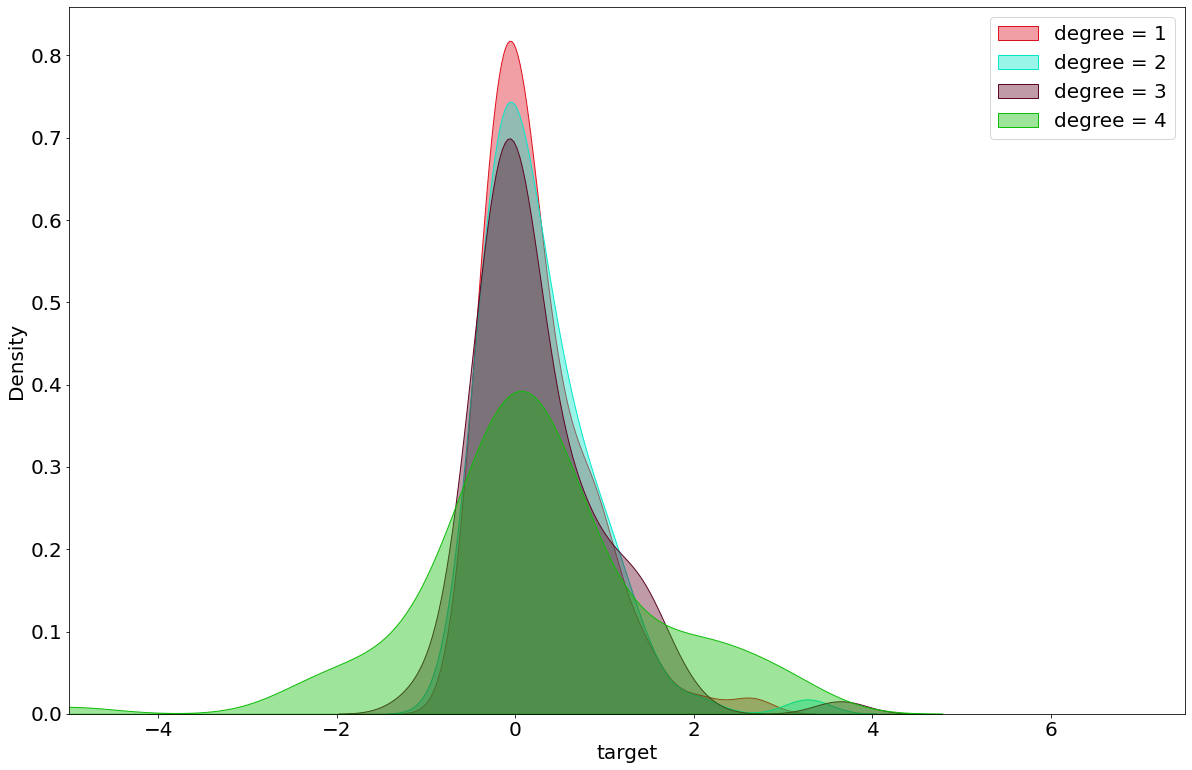

In [13]:
for i in range(n_poly-1):
    
    print('degree =', i+1)
    lr = LinearRegression()
    lr.fit(X_train_[i], y_train)
    print('r^2 score =', lr.score(X_test_[i], y_test))
    print('mae =', mean_absolute_error(lr.predict(X_test_[i]), y_test))
    
    #Density plot
    err_lr = (lr.predict(X_test_[i]) - y_test)/y_test
    sns.kdeplot(err_lr, alpha = 0.4, fill = True, color = np.random.uniform(0,1,3), label = 'degree = {}'.format(i+1))
    plt.xlim(-5,7.5)
    plt.legend()
    plt.grid()

Best regression polynomial degree = 1

SUPPORT VECTOR MACHINE

degree = 1
r^2 score = 0.4326477845430451
mae = 46.50866998460489
Best parameters: {'C': 200, 'epsilon': 1, 'kernel': 'linear'}
degree = 2
r^2 score = 0.4346304195338473
mae = 46.543357587560074
Best parameters: {'C': 200, 'epsilon': 0.1, 'kernel': 'linear'}
degree = 3
r^2 score = 0.4346221729882731
mae = 46.54428216902289
Best parameters: {'C': 200, 'epsilon': 0.1, 'kernel': 'linear'}
degree = 4
r^2 score = 0.4346222392760718
mae = 46.544250884367244
Best parameters: {'C': 200, 'epsilon': 0.1, 'kernel': 'linear'}


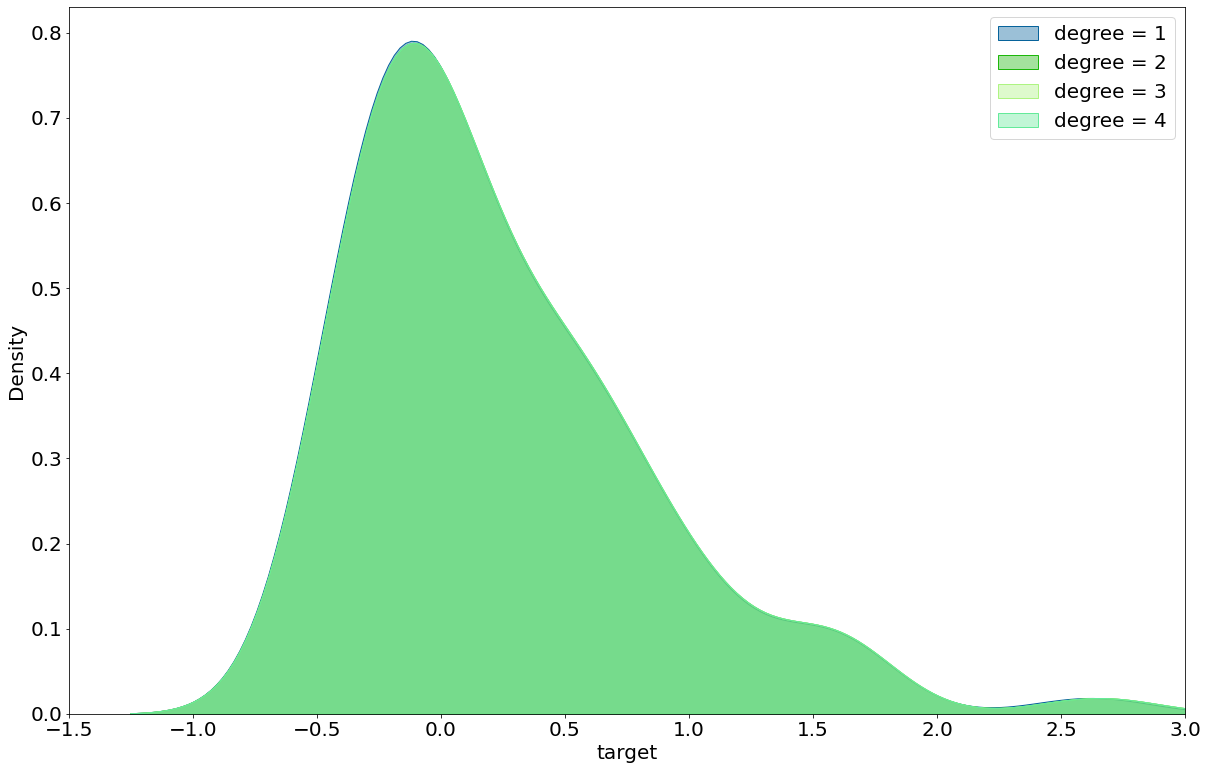

In [14]:
params = {'kernel':['linear', 'rbf', 'poly'],
          'C':[0.01, 0.1, 1, 10 , 100, 200],
          'epsilon':[0.0001, 0.001, 0.01, 0.1, 1]}

for i in range(n_poly - 1):
    
    print('degree =', i+1)
    svr = SVR()
    grid = GridSearchCV(svr, params)
    grid.fit(X_train_[i], y_train)
    best = grid.best_estimator_
    
    print('r^2 score =', best.score(X_test_[i], y_test))
    print('mae =', mean_absolute_error(best.predict(X_test_[i]), y_test))
    print('Best parameters:', grid.best_params_)
    
    err_svr = (best.predict(X_test_[i]) - y_test)/y_test
    sns.kdeplot(err_svr, alpha = 0.4, fill = True, color = np.random.uniform(0,1,3), label = 'degree = {}'.format(i+1))
    plt.xlim(-1.5,3)
    plt.legend()
    plt.grid()

SVM performs better independently from the degree of features

RANDOM FOREST

degree = 1
r^2 score = 0.4309547487306775
mae = 47.116171629011546
Best parameters: {'max_depth': 3, 'n_estimators': 10}
degree = 2
r^2 score = 0.3974952216708426
mae = 47.68990097901199
Best parameters: {'max_depth': 4, 'n_estimators': 80}
degree = 3
r^2 score = 0.44884856497890246
mae = 45.59411188082831
Best parameters: {'max_depth': 4, 'n_estimators': 90}
degree = 4
r^2 score = 0.4104147569952372
mae = 47.39193399003579
Best parameters: {'max_depth': 4, 'n_estimators': 60}


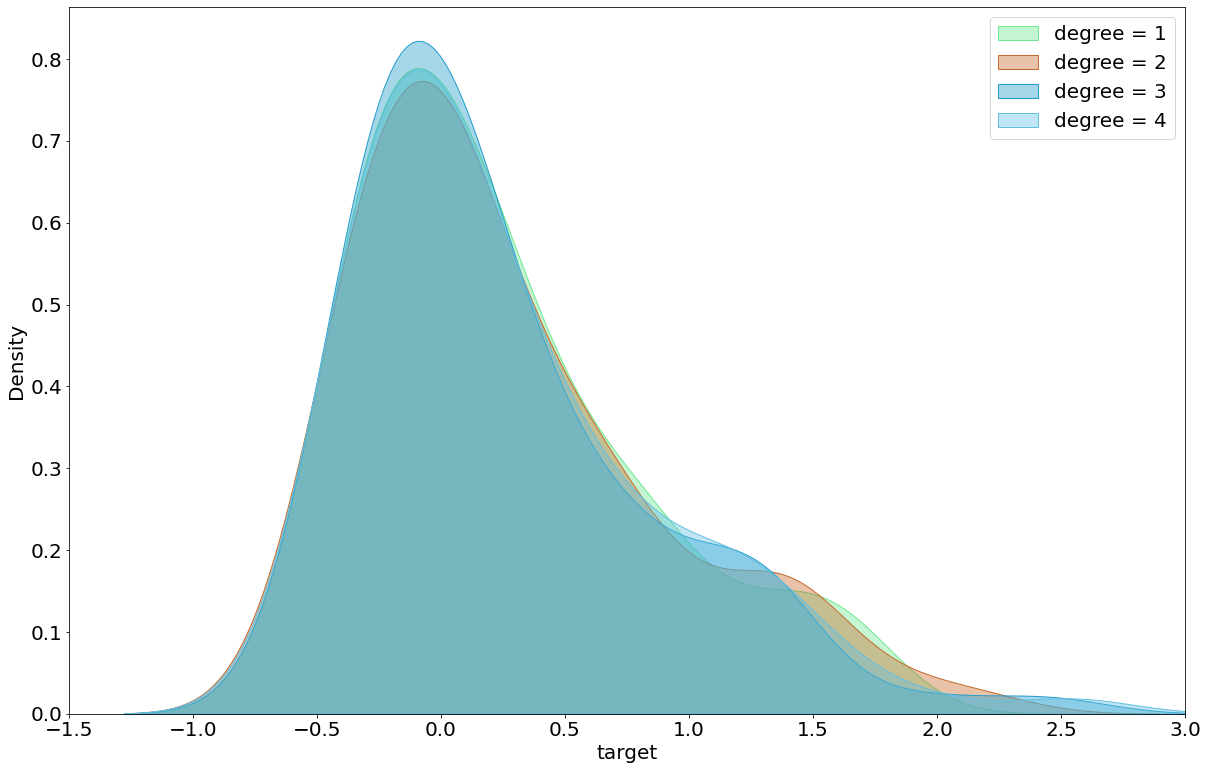

In [15]:
params = {'n_estimators':[i*10 for i in range(10)], 'max_depth':[i for i in range(6)]}

for i in range(n_poly - 1):
    
    print('degree =', i+1)
    rf = RandomForestRegressor(max_features = 'sqrt')
    grid = GridSearchCV(rf, params)
    grid.fit(X_train_[i], y_train)
    best = grid.best_estimator_
    
    print('r^2 score =', best.score(X_test_[i], y_test))
    print('mae =', mean_absolute_error(best.predict(X_test_[i]), y_test))
    print('Best parameters:', grid.best_params_)
    
    err_rf = (best.predict(X_test_[i]) - y_test)/y_test
    sns.kdeplot(err_rf, alpha = 0.4, fill = True, color = np.random.uniform(0,1,3), label = 'degree = {}'.format(i+1))
    plt.xlim(-1.5,3)
    plt.legend()
    plt.grid()

Same as the SVM

In [16]:
RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           #kernel_initializer="lecun_normal",
                           kernel_regularizer=keras.regularizers.l2(0.5)
                          )
callback = keras.callbacks.EarlyStopping(monitor='val_mae', patience=10)
kf = StratifiedKFold(n_splits = 3)

for i in range(n_poly - 1):
    for train, valid in kf.split(X_train_[i], y_train):
        #Neural Network
        neural = keras.models.Sequential([
            keras.layers.InputLayer(input_shape = X_train_[i].shape[1:]),
            RegularizedDense(300),
            RegularizedDense(150),
            RegularizedDense(50),
            keras.layers.Dense(1)])

        neural.compile(loss= 'mean_squared_error', optimizer = 'Nadam', metrics = ['mae'])
        history = neural.fit(X_train_[i][train], y_train[train],
                            validation_data = (X_train_[i][valid], y_train[valid]),
                            epochs = 100,
                            callbacks = [callback],
                            verbose = 0)
    print('Degree =', i+1)
    print(f'mae = {neural.evaluate(X_test_[i], y_test)[1]}')

Degree = 1
3/3 [==============================] - 0s 0s/step - loss: 3688.8174 - mae: 47.8596
mae = 47.85956573486328
Degree = 2
3/3 [==============================] - 0s 0s/step - loss: 3741.0647 - mae: 47.9953
mae = 47.99530792236328
Degree = 3
3/3 [==============================] - 0s 2ms/step - loss: 3741.9080 - mae: 48.0558
mae = 48.055789947509766
Degree = 4
3/3 [==============================] - 0s 2ms/step - loss: 3748.5127 - mae: 48.0591
mae = 48.059059143066406


As the previous

Conclusioni:
<br>
The dataset is small and the outcome vary widely depending on the initial split of the data, so comments aren't always accurate
<br>
The only consideration is that all the models except for the linear regression, have the same performances indipendently from the features degree